---

### Комментарий наставника

Привет, Александр! Спасибо за вовремя сданную работу :)

Исследование очень понравилось, а также хочу дополнительно тебя поблагодарить. Мне искренне было интересно читать.

Ты умеешь пользоваться инструментарием, и уже делаешь интересные и полезные выводы. Также не могу отметить, что визуализация приятна и уместна. Правда, "отрезай" даты до того размера, которое сообщит пользователю полезную информацию (подробней в комментарии).

Все комментарии ты увидишь под соответствующими ячейками.

---

#### Аналитика в Яндекс.Афише

#### Описание проекта

Вас пригласили на стажировку в отдел аналитики Яндекс.Афиши. Первое задание: помочь маркетологам оптимизировать маркетинговые затраты.
    
У вас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
    
лог сервера с данными о посещениях сайта Яндекс.Афиши,

выгрузка всех заказов за этот период,

статистика рекламных расходов.

Вы изучите:
    
как люди пользуются продуктом,

когда они начинают покупать,

сколько денег приносит каждый клиент

когда клиент окупается.

Инструкция по выполнению проекта:

#### Шаг 1. Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный.

Путь к файлам: /datasets/visits_log.csv /datasets/orders_log.csv /datasets/costs.csv

#### Шаг 2. Постройте отчёты и посчитайте метрики

Продукт

Сколько людей пользуются в день, неделю, месяц?

Сколько сессий в день?

Сколько длится одна сессия?

Как часто люди возвращаются?

Продажи

Когда люди начинают покупать?

Сколько раз покупают за период?

Какой средний чек?

Сколько денег приносят? (LTV)

Маркетинг

Сколько денег потратили? Всего / на каждый источник / по времени

Сколько стоило привлечение одного покупателя из каждого источника?

На сколько окупились расходы? (ROI)

Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?

#### Шаг 3. Напишите вывод: порекомендуйте маркетологам, куда и сколько им стоит вкладывать денег?

Какие источники/платформы вы бы порекомендовали? Объясните свой выбор: на какие метрики вы ориентируетесь? Почему? Какие выводы вы сделали, узнав значение метрик?
    
Оформление: Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.

Описание данных

Таблица visits (лог сервера с информацией о посещениях сайта):
    
Uid — уникальный идентификатор пользователя

Device — категория устройства пользователя

Start Ts — дата и время начала сессии

End Ts — дата и время окончания сессии

Source Id — идентификатор рекламного источника, из которого пришел пользователь

Таблица orders (информация о заказах):

Uid — уникальный id пользователя, который сделал заказ

Buy Ts — дата и время заказа

Revenue — выручка Яндекс.Афиши с этого заказа

Таблица costs (информация о затратах на маркетинг):

source_id — идентификатор рекламного источника

dt — дата

costs — затраты на этот рекламный источник в этот день

#### СОДЕРЖАНИЕ

1. Получение общей информации о данных
2. Предобработка данных
3. Продуктовые метрики
4. Продажные метрики 
5. Маркетинговые метрики
6. Графический раздел
7. Итоговый вывод

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

###### 1. Получение общей информации о данных

In [2]:
#Импортируем полученные таблицы

visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

Познакомимся с имеющимися данными, автоматизировав вывод информации о содержимом датасетов

In [3]:
def information(data):
    """выводит информацию о содержиом датасетов в удобоваримом виде: head, shape, info, describe"""
    
    print('---------- ИНФОРМАЦИЯ О ТАБЛИЦЕ -------------')
    print()
    print('-----------Первые 5 строк--------------------')
    print()
    print(data.head(5))
    print()
    print('-----------Длина таблицы----------------------')
    print()
    print(data.shape[0], 'строк')
    print()
    print()
    print('-----Информация о содержимом и его типах------')
    print()
    print(data.info())
    print()
    print('--------------Разброс данных------------------')
    print()
    print(data.describe())
    print('----------------------------------------------')

---

### Комментарий наставника

Молодец! Плюсую за автоматизацию :)

Хотя **head** и **describe** выглядят непривлекательно, если их вызвать в **print**. Вот тут можно было и оставить без автоматизации. Но в первую очередь, ты это делаешь для себя.

---

**VISITS**

In [4]:
information(visits)

---------- ИНФОРМАЦИЯ О ТАБЛИЦЕ -------------

-----------Первые 5 строк--------------------

                    Uid   Device            End Ts  Source Id  \
0  16879256277535980062    touch  20.12.2017 17:38          4   
1    104060357244891740  desktop  19.02.2018 17:21          2   
2   7459035603376831527    touch   01.07.2017 1:54          5   
3  16174680259334210214  desktop  20.05.2018 11:23          9   
4   9969694820036681168  desktop  27.12.2017 14:06          3   

           Start Ts  
0  20.12.2017 17:20  
1  19.02.2018 16:53  
2   01.07.2017 1:54  
3  20.05.2018 10:59  
4  27.12.2017 14:06  

-----------Длина таблицы----------------------

358532 строк


-----Информация о содержимом и его типах------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358532 entries, 0 to 358531
Data columns (total 5 columns):
Uid          358532 non-null uint64
Device       358532 non-null object
End Ts       358532 non-null object
Source Id    358532 non-null int64
Start Ts     35853

В таблице visits содержится 358 532 записи о посещениях. В столбцах таблицы отсутствуют пропуски. Для подготовки к работе этой таблицы требуется:

изменить названия столбцов (убрать заглавные буквы и пробелы);

изменить тип данных на временной в столбцах "End Ts" и "Start Ts".

---

### Комментарий наставника

ну да, будет не лишним.

---

**ORDERS**

In [5]:

information(orders)

---------- ИНФОРМАЦИЯ О ТАБЛИЦЕ -------------

-----------Первые 5 строк--------------------

                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

-----------Длина таблицы----------------------

50415 строк


-----Информация о содержимом и его типах------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None

--------------Разброс данных------------------

            Revenue           Uid
count  50415.000000  5.041500e+04
mean       4.999647  9.098161e+18
std       21.818359  5.285742e+18
min       

В таблице orders содержится 50 415 записей о заказах. В столбцах таблицы отсутствуют пропуски. Для подготовки к работе этой таблицы требуется:

изменить названия столбцов (убрать заглавные буквы и пробелы);

изменить тип данных на временной в столбце "Buy Ts";

ознакомиться с выбросами столбца "Revenue": минимальные - 0 (как такое возможно?), максимальное значение - 2633,28.

---

### Комментарий наставника

Тут надо смотреть внимательней (про **0**). Главное, не торопиться с выводами.

Здорово, что не упустил из виду.

---


**COSTS**

In [6]:

information(costs)

---------- ИНФОРМАЦИЯ О ТАБЛИЦЕ -------------

-----------Первые 5 строк--------------------

   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08

-----------Длина таблицы----------------------

2542 строк


-----Информация о содержимом и его типах------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None

--------------Разброс данных------------------

         source_id        costs
count  2542.000000  2542.000000
mean      4.857199   129.477427
std       3.181581   156.296628
min       1.000000     0.540000
25%       2.000000    21.945000
50%       4.000000    77.295000
75%       9.000000   170.065000
max      10.000000  178

В таблице costs содержится 2 542 записи о затратах на маркетинг. В столбцах таблицы отсутствуют пропуски. Для подготовки к работе этой таблицы требуется:

изменить тип данных на временной в столбце "dt".

##### 2. Предобработка данных

Для подготовки таблиц к работе, нам необходимо устранить выявленные в предыдущем шаге недостатки данных.

**Переименование столбцов**

In [7]:
def change_name(data):
    
    """заменяет в заголовке столбца пробелы на нижнее подчеркивание и приводит заглавные буквы к строчному виду"""
    
    new_columns = data.columns
    new_columns = new_columns.str.replace(' ', '_')
    new_columns = new_columns.str.lower()
    data.columns = new_columns

In [8]:
change_name(visits)
change_name(orders)
change_name(costs)

In [9]:
visits.columns

Index(['uid', 'device', 'end_ts', 'source_id', 'start_ts'], dtype='object')

In [10]:
orders.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

In [11]:
costs.columns

Index(['source_id', 'dt', 'costs'], dtype='object')

**Изменение типов данных**

In [12]:
visits.head()

,uid,device,end_ts,source_id,start_ts
0,16879256277535980062,touch,20.12.2017 17:38,4,20.12.2017 17:20
1,104060357244891740,desktop,19.02.2018 17:21,2,19.02.2018 16:53
2,7459035603376831527,touch,01.07.2017 1:54,5,01.07.2017 1:54
3,16174680259334210214,desktop,20.05.2018 11:23,9,20.05.2018 10:59
4,9969694820036681168,desktop,27.12.2017 14:06,3,27.12.2017 14:06


In [13]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format="%d.%m.%Y %H:%M")

In [14]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format="%d.%m.%Y %H:%M")

In [15]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format="%Y-%m-%d %H:%M:%S")

In [16]:

costs['dt'] = pd.to_datetime(costs['dt'], format="%Y-%m-%d")


**Максимальные и минимальные значения**

**ORDERS**

In [17]:
orders.sort_values('revenue', ascending = False).head(10)

,buy_ts,revenue,uid
23244,2017-12-10 20:17:00,2633.28,5539673724080479777
36522,2018-02-23 08:54:00,1236.28,11149926373378902217
36682,2018-02-24 09:25:00,1221.37,11149926373378902217
23165,2017-12-10 13:04:00,1195.64,5539673724080479777
24607,2017-12-17 18:06:00,1109.10,11149926373378902217
47507,2018-05-16 19:53:00,1080.44,11149926373378902217
40386,2018-03-18 09:13:00,1073.11,11149926373378902217
45653,2018-04-26 20:06:00,948.44,11149926373378902217
40020,2018-03-15 19:22:00,856.78,11149926373378902217
40643,2018-03-19 18:15:00,685.67,11149926373378902217


In [18]:
top10_orders = orders.sort_values('revenue', ascending = False).head(10).reset_index()
print(top10_orders['uid'].unique())

#выделим выручки, которые попали в 10 самых крупных
top10_orders = top10_orders['revenue']

[ 5539673724080479777 11149926373378902217]


Занимательно, что uid топ-10 вырученных с продажи билетов средств, принадлежит всего двум пользователям. Имеет смысл очистить данные от выбросов.

---

### Комментарий наставника

Посмотри распределение **revenue** с помощью гистограммы. Таким образом у тебя будет визуальная картина, а не только отобранный десяток. 

Также не стоит спешить с удалением пользователей. Лучше очистить покупку, но не пользователя. Ведь это может быть постоянный клиент, и если он разово сделал покупку на бОльшую сумму, чем остальные клиенты, то это абсолютно не значит, что остальные его покупки не несут пользу для анализа.

---

In [19]:
orders.sort_values('revenue').head(10)

,buy_ts,revenue,uid
20720,2017-11-28 16:01:00,0.0,8277558335454815700
1802,2017-06-22 18:19:00,0.0,17030528792926543083
20783,2017-11-28 19:42:00,0.0,2037345392173160982
44844,2018-04-20 17:33:00,0.0,5570343171257035973
45084,2018-04-22 18:38:00,0.0,5570343171257035973
21407,2017-12-01 18:05:00,0.0,2936104404423239931
21404,2017-12-01 17:53:00,0.0,15254206642996645755
49234,2018-05-28 08:55:00,0.0,14973814017160376581
44931,2018-04-21 13:02:00,0.0,4927261749585088199
21180,2017-11-30 18:30:00,0.0,2037345392173160982


In [20]:
orders.query('revenue == 0')['uid'].count()

51

Нулевая выручка может быть обусловлена акцией или бесплатным распространением пригласительных по предварительной регистрации, поэтому, при первом приближении, это данные нам не помешают

---

### Комментарий наставника

Весьма логичное предположение. Согласен.

---

In [21]:
stat_orders = orders.describe()  
stat_orders

,revenue,uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [22]:
# Высчитаем "верхний" ус и создадим на его основе фильтр. 
""""Q3+1.5*(Q3 - Q1)"""

stat_orders = orders.describe()    
up_filt = stat_orders.loc['75%', 'revenue'] + 1.5 * (stat_orders.loc['75%', 'revenue'] - stat_orders.loc['25%', 'revenue'])

print('-------------------------------------')
print('Выбросы >', up_filt)
print('-------------------------------------')
print('Полный объем данных до удаления выборосов:', len(orders))   
print('Всего выборосов:', len(orders.query('revenue >= @up_filt')))   
print('Из них уникальных пользователей:' , len(orders.query('revenue >= @up_filt')['uid'].unique()))

-------------------------------------
Выбросы > 10.395
-------------------------------------
Полный объем данных до удаления выборосов: 50415
Всего выборосов: 3990
Из них уникальных пользователей: 2716


Уж слишком большой пласт данных останется за пределами исследования. Оставим полученные результаты до лучших времен: богатые арабские шейхи тоже заслуживают права попасть в когортный анализ. Кто знает, может именно их таргетировал маркетинг. В прочем, чтобы не сильно сбивать метрики, отрежем топ-10 заказов по выручкам.

---

### Комментарий наставника

В этом месте, по твоим наблюдениям, было бы разумно разделить выборку на 2 части, и вследствии анализировать "обычных" и "богатых". 

То есть, анализировать "выбросы" и нормальные данные раздельно. Если говорить о масштабе выбросов, то 10 записей - это капля в море :)

Также повторюсь про гистограмму. Здесь она была бы уместна, и могла наглядно подтвердить/опровергнуть твои находки

---

In [23]:
orders = orders.query('revenue not in @top10_orders')
len(orders)

50405

#### 3. Продуктовые метрики

**Сколько людей пользуется Яндекс.Афишей каждый день, неделю, месяц?**

Для ответа на поставленный вопрос нам необходимо будет рассчитать: DAU, WAU, MAU. В первую очередь подготовим таблицу VISITS для дальнейшей работы, выделив день посещения, неделю и, соответственно, месяц.

In [24]:
visits['session_date'] = visits['start_ts'].dt.date
visits['session_week'] = visits['start_ts'].dt.week
visits['session_month'] = visits['start_ts'].dt.month
visits['session_year'] = visits['start_ts'].dt.year

In [25]:
visits.head()

,uid,device,end_ts,source_id,start_ts,session_date,session_week,session_month,session_year
0,16879256277535980062,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,2017-12-20,51,12,2017
1,104060357244891740,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,2018-02-19,8,2,2018
2,7459035603376831527,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,2017-07-01,26,7,2017
3,16174680259334210214,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,2018-05-20,20,5,2018
4,9969694820036681168,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,2017-12-27,52,12,2017


In [26]:
dau = visits.groupby('session_date').agg({'uid' : 'nunique'})
print(dau.head(10))

              uid
session_date     
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
2017-06-06    797
2017-06-07    699
2017-06-08    868
2017-06-09    695
2017-06-10    350


In [27]:

wau = visits.groupby(['session_year', 'session_week']).agg({'uid' : 'nunique'})
print(wau.head(10))

                            uid
session_year session_week      
2017         22            2021
             23            4129
             24            2812
             25            2878
             26            3064
             27            3294
             28            4355
             29            3841
             30            2655
             31            2364


In [28]:

mau = visits.groupby(['session_year', 'session_month']).agg({'uid' : 'nunique'})
print(mau.head(10))

                              uid
session_year session_month       
2017         6              13259
             7              14183
             8              11631
             9              18975
             10             29692
             11             32797
             12             31557
2018         1              28716
             2              28749
             3              27473


In [29]:

print('В среднем в ДЕНЬ сервис Яндекс.Афиша используют {} уникальных пользователей'.format(int(dau['uid'].mean())))
print('В среднем в НЕДЕЛЮ сервис Яндекс.Афиша используют {} уникальных пользователей'.format(int(wau['uid'].mean())))
print('В среднем в МЕСЯЦ сервис Яндекс.Афиша используют {} уникальных пользователей'.format(int(mau['uid'].mean())))

В среднем в ДЕНЬ сервис Яндекс.Афиша используют 907 уникальных пользователей
В среднем в НЕДЕЛЮ сервис Яндекс.Афиша используют 5716 уникальных пользователей
В среднем в МЕСЯЦ сервис Яндекс.Афиша используют 23228 уникальных пользователей


---

### Комментарий наставника

Молодец! Видно, что умеешь эффективно пользоваться pandas и понимаешь метрики.

**РЕКОМЕНДАЦИЯ:** Не заворачивай **head** в **print**. Выглядит хуже, чем могло быть

---

**Сколько сессий в день?**

Для того, чтобы рассчитать количество произведенных сессий за один день, создадим сводную таблицу и посчитаем усредненные цифры

In [30]:
how_sessions = visits.groupby('session_date')['uid'].count().reset_index()
print('В среднем в день происходит {:.2f} сессий'.format(how_sessions['uid'].mean()))

В среднем в день происходит 984.98 сессий


**Сколько длится одна сессия?**

Чтобы подсчитать продолжительность сессии, нам необходимо доработать таблицу VISITS.

In [31]:
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()

In [32]:

print('Средняя продолжительность одной сессии составляет {:.2f} секунд'.format(visits['session_duration'].mean()))
print('Медианная продолжительность одной сессии составляет {:.2f} секунд'.format(visits['session_duration'].median()))
print('Наиболее распространенная продолжительность сессии составляет {:.2f} секунд'.format(visits['session_duration'].mode()[0]))

Средняя продолжительность одной сессии составляет 644.54 секунд
Медианная продолжительность одной сессии составляет 300.00 секунд
Наиболее распространенная продолжительность сессии составляет 60.00 секунд



Судя по результатам проведенного подсчета, в таблице много выбросов по времени посещения.

-2760.0

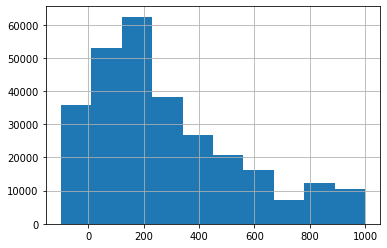

In [33]:
visits['session_duration'].hist(bins = 10, range = (-100, 1000))
visits['session_duration'].min()


Если излишне продолжительные сессии могут быть обусловленными поведенчискими особенностями клиенту, то отрицательные данные напрямую препятствует аналитической работе и могут в последующем стать проблемой для анализа, если потребуется обратиться к данной метрике. Нулевые значения оставим для работы.

---

### Комментарий наставника

Здорово, что ты обратил на это внимание.

---

In [34]:

print('Всего сессий:', len(visits))
print('Всего отрицательных значений:', 
      len(visits.query('session_duration < 0.0')), 
      '({:.2%})'.format(len(visits.query('session_duration < 0.0')) / len(visits)))
print('Всего нулевых значений:', 
      len(visits.query('session_duration == 0.0')), 
      '({:.2%})'.format(len(visits.query('session_duration == 0.0')) / len(visits)))

Всего сессий: 358532
Всего отрицательных значений: 2 (0.00%)
Всего нулевых значений: 35794 (9.98%)


In [35]:
#уберем отрицательные значения

visits_clean = visits.query('session_duration >= 0')
print('Объем данных:' , len(visits_clean))
visits_clean['session_duration'].min()

Объем данных: 358530


0.0

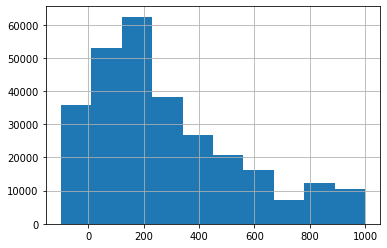

In [36]:
visits_clean['session_duration'].hist(bins = 10, range = (-100, 1000))

**Как часто люди возвращаются? (Retention Rate)**

Для того, чтобы ответить на этот вопрос, разделим пользователей на месячные когорты и отследим, много ли из них вернулось на сервис повторно.

In [37]:
#В первую очередь, узнаем дату первого посещения (не покупки).

first_visits = visits_clean.groupby(['uid'])['start_ts'].min().reset_index()
first_visits.columns = ['uid', 'first_visit']
first_visits.head()

,uid,first_visit
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [38]:

# Добавим получившиеся данные в исходную таблицу

visits_clean = visits_clean.merge(first_visits)

In [39]:
#Выделим месяц первого посещения и месяц каждого посещения

visits_clean['first_visit_month'] = visits_clean['first_visit'].astype('datetime64[M]')
visits_clean['visit_month'] = visits_clean['start_ts'].astype('datetime64[M]')

In [40]:

#Определим продолжительность жизни каждого пользователя, отняв дату его первого посещения от его последующего посещения

visits_clean['lifetime'] = (visits_clean['visit_month'] - visits_clean['first_visit_month'])/ np.timedelta64(1, 'M')
visits_clean['lifetime'] = visits_clean['lifetime'].round().astype('int')

In [41]:
#Выделим когорты по времени первого посещения, а так же рассчитаем размер первоначального состава когорт

cohort_visits = visits_clean.groupby(['first_visit_month', 'lifetime']).agg({'uid': 'nunique'}).reset_index()
inital_uid = cohort_visits[cohort_visits['lifetime'] == 0][['first_visit_month', 'uid']]
inital_uid.columns = ['first_visit_month', 'inital_uid']
inital_uid.head()

,first_visit_month,inital_uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


In [42]:
#Добавим получившиеся данные в общую таблицу по когортам и рассчитаем Retention Rate

cohort_visits = cohort_visits.merge(inital_uid)
cohort_visits['retention'] = cohort_visits['uid'] / cohort_visits['inital_uid']
visits_retention_pivot = cohort_visits.pivot_table(index = 'first_visit_month', 
                                                   columns = 'lifetime', values = 'retention', aggfunc = 'sum')

#visits_retention_pivot = visits_retention_pivot.fillna(' ')
visits_retention_pivot.mean()*100

lifetime
0     100.000000
1       6.516660
2       4.633262
3       4.275990
4       4.059457
5       3.944383
6       3.695659
7       3.750912
8       3.546465
9       3.515906
10      3.406250
11      4.495060
dtype: float64

Автоматизируем воспроизведение тепловых карт

In [43]:
def heatmap_cohort(data, title, f0rmat):

    sns.set(style = 'white')
    plt.figure(figsize = (15, 9))
    plt.title(title)
    sns.heatmap(data, annot = True, fmt = f0rmat, linewidths = 1, linecolor = 'white')
    plt.show()

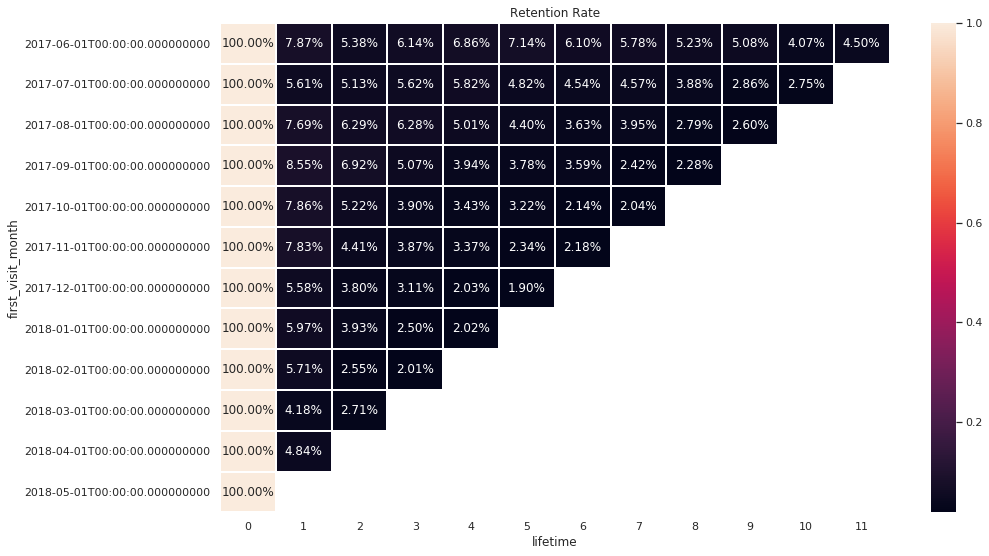

In [44]:
heatmap_cohort(visits_retention_pivot, 'Retention Rate', '.2%')

В среднем уже в следующем после первого посещения месяце 93% пользователей покидают сервис, так и не верневшись. Но оставшиеся 7% потребителей падают куда более плавно. Вероятно это особенности бизнеса: лишь малая часть клиентов приобретают билеты на мероприятия регулярно, для большей же части людей это скорее грандиозное событие, чем рутинное предприятие.

---

### Комментарий наставника

Интересно получилось. Думаю, твои результаты помогут бизнесу пересмотреть ряд вопросов по работе с клиентом.

Ко всем твоим наблюдениям также неплохо было бы добавить ежедневный анализ. Человек может не вернуться в следующем месяце, но в течении нескольких недель интересовался сервисом. Такое упускать не стоит. 

На самом деле, тут необходимо уточнение от постановщика задачи.

---

#### 4. Продажные метрики

#### *Когда люди начинают покупать?*


Чтобы оценить время, необходимое для того, чтобы пользователь из "посетителя" стал "покупателем", необходимо узнать когда был совершен первый визит пользователя, совершившего покупку.

In [45]:
orders_and_visits = orders.merge(first_visits)

In [46]:
orders_and_visits.head()

,buy_ts,revenue,uid,first_visit
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00


Так как мы знаем дату совершения заказа, сможем вычислить дельту времени, которая потребовалась пользователю для покупки.

In [47]:
orders_and_visits['lifetime'] = (orders_and_visits['buy_ts'] - orders_and_visits['first_visit']) / np.timedelta64(1, 'M')
orders_and_visits['lifetime'] = orders_and_visits['lifetime'].round().astype('int')
orders_and_visits['first_visit_month'] = orders_and_visits['first_visit'].astype('datetime64[M]')

In [48]:
orders_pivot = orders_and_visits.pivot_table(index = 'first_visit_month', columns = 'lifetime', values = 'uid',
                                            aggfunc = 'nunique')
#orders_pivot = orders_pivot.fillna('')
orders_pivot.mean()

lifetime
0     2533.833333
1      230.083333
2      165.181818
3      135.500000
4      133.333333
5      115.375000
6      114.285714
7       91.833333
8       89.600000
9       70.500000
10      65.000000
11      77.500000
12      59.000000
dtype: float64

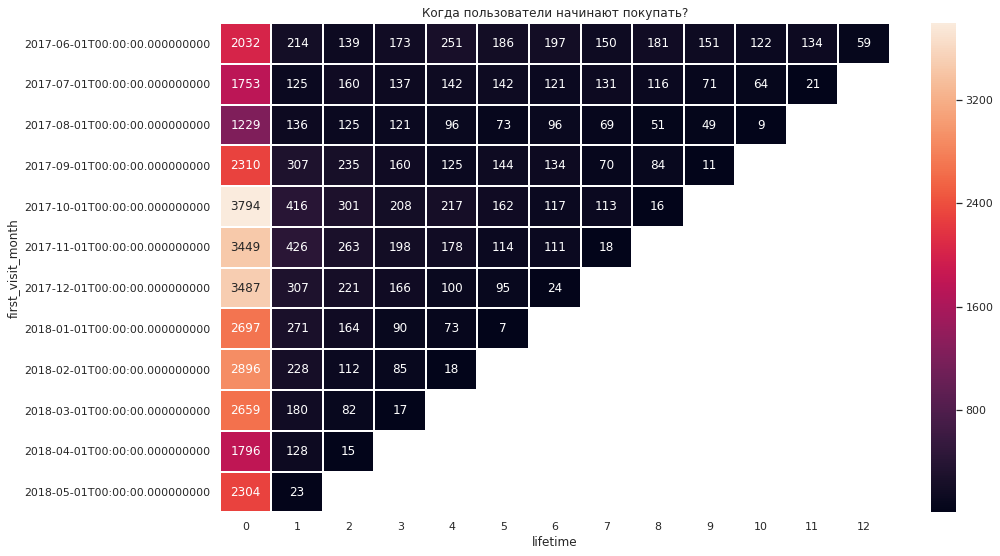

In [49]:
heatmap_cohort(orders_pivot, 'Когда пользователи начинают покупать?', '.0f')


Большая часть пользователей покупает в первый же месяц попадания на сервис, а с течением времени, к сожалению, лишь малая часть возвращается за повторным приобретением билетов.

При построении тепловой карты становится очевидно, что вместо ожидаемого периода в 12 месяцев, по факту получилось 13. Посмотрим, что за заказы содержаться в этом блоке.

---

### Комментарий наставника

**РЕКОМЕНДАЦИЯ:** Чтобы было легче воспринимать график, отсекай "хвосты" дат. Нас интересует год и месяц. Остальное будет отвлекать внимание тех, кому ты всё это будешь показывать.

---

In [50]:

lifetime_12 = orders_and_visits.query('lifetime == 12')
lifetime_12.head()

,buy_ts,revenue,uid,first_visit,lifetime,first_visit_month
275,2018-05-17 16:26:00,0.37,9402519610129672491,2017-06-01 13:53:00,12,2017-06-01
276,2018-05-30 19:45:00,0.98,9402519610129672491,2017-06-01 13:53:00,12,2017-06-01
283,2018-05-21 00:50:00,0.12,13128309044400650573,2017-06-01 14:18:00,12,2017-06-01
284,2018-05-22 10:32:00,0.49,13128309044400650573,2017-06-01 14:18:00,12,2017-06-01
330,2018-05-31 13:32:00,4.89,16674220541096562302,2017-06-01 14:29:00,12,2017-06-01



Это даты, находящиеся на максимально возможном удалении друг от друга. С данными все в порядке.

**Вернемся к ответу на вопрос: когда начинают покупать?**

In [51]:
#выделим время, которое требуется каждому покупателю для совершения заказа и приведем его к минутам.
#так как нам точно известно, что большая часть пользователей совершает покупку только в свой первый визит,
#оставим в данном исследовании только их.

orders_and_visits_time = orders_and_visits.query('lifetime == 0')

orders_and_visits_time['time_to_purchase_min'] = ((orders_and_visits_time['buy_ts'] -  orders_and_visits_time['first_visit'])
                                         / np.timedelta64(1, 'm'))
orders_and_visits_time['time_to_purchase_min'] = orders_and_visits_time['time_to_purchase_min'].astype('float')
orders_and_visits_time.head()

,buy_ts,revenue,uid,first_visit,lifetime,first_visit_month,time_to_purchase_min
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,0,2017-06-01,1.0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,0,2017-06-01,11.0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,0,2017-06-01,2.0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,0,2017-06-01,15.0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,0,2017-06-01,27.0


In [52]:
print('В среднем для совершения заказа требуется {:.2f} минуты'
      .format(orders_and_visits_time['time_to_purchase_min'].mean()))
print('Медианное время, необходимо для заказа {:.2f} минут'
      .format(orders_and_visits_time['time_to_purchase_min'].median()))
print('Наиболее распространенное время, необходимое для совершения заказа {:.2f} минута'
      .format(orders_and_visits_time['time_to_purchase_min'].mode()[0]))

В среднем для совершения заказа требуется 1609.93 минуты
Медианное время, необходимо для заказа 13.00 минут
Наиболее распространенное время, необходимое для совершения заказа 1.00 минута


-1381.0

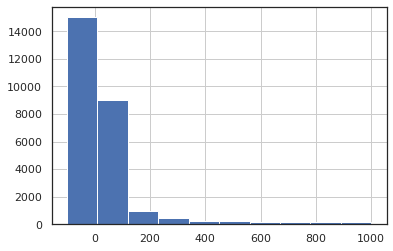

In [53]:
orders_and_visits_time['time_to_purchase_min'].hist(bins = 10, range = (-100, 1000))
orders_and_visits_time['time_to_purchase_min'].min()

Мы снова видим много отрицательных выбросов, которые могут быть связаны с временем регистрации визита: например, если пользователь начал оформлять заказ на рекламном источнике, и лишь после завершения покупки был перенаправлен на сайт Яндекс.Афиши. Почистим данные

---

### Комментарий наставника

Действительно, такое могло быть. Согласен с твоим наблюдением

---

In [54]:
print('Отрицательная сессия:', len(orders_and_visits_time.query('time_to_purchase_min < 0')))
print('Количество данных после чистки:', len(orders_and_visits_time.query('time_to_purchase_min > 0')))

Отрицательная сессия: 894
Количество данных после чистки: 31981


In [55]:
orders_and_visits_time = orders_and_visits_time.query('time_to_purchase_min > 0')

In [56]:
print('В среднем для совершения заказа требуется {:.2f} минуты'
      .format(orders_and_visits_time['time_to_purchase_min'].mean()))
print('Медианное время, необходимо для заказа {:.2f} минут'
      .format(orders_and_visits_time['time_to_purchase_min'].median()))
print('Наиболее распространенное время, необходимое для совершения заказа {:.2f} минута'
      .format(orders_and_visits_time['time_to_purchase_min'].mode()[0]))

В среднем для совершения заказа требуется 1742.99 минуты
Медианное время, необходимо для заказа 16.00 минут
Наиболее распространенное время, необходимое для совершения заказа 1.00 минута


1.0

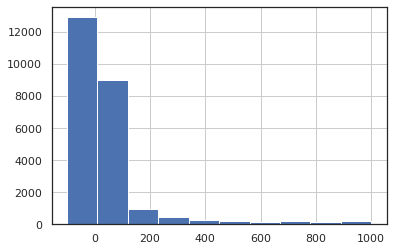

In [57]:
orders_and_visits_time['time_to_purchase_min'].hist(bins = 10, range = (-100, 1000))
orders_and_visits_time['time_to_purchase_min'].min()

**Сколько раз покупают за период?**

Для того, чтобы ответить на поставленный вопрос, нам необходимо определиться с размером периода. Расчитаем количество покупок для дня, для недели, месяца

In [58]:
orders_and_visits['buy_ts_date'] = orders_and_visits['buy_ts'].dt.date
orders_and_visits['buy_ts_week'] = orders_and_visits['buy_ts'].dt.week
orders_and_visits['buy_ts_month'] = orders_and_visits['buy_ts'].dt.month
orders_and_visits['buy_ts_year'] = orders_and_visits['buy_ts'].dt.year
orders_and_visits.head()

,buy_ts,revenue,uid,first_visit,lifetime,first_visit_month,buy_ts_date,buy_ts_week,buy_ts_month,buy_ts_year
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,0,2017-06-01,2017-06-01,22,6,2017
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,0,2017-06-01,2017-06-01,22,6,2017
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,0,2017-06-01,2017-06-01,22,6,2017
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,0,2017-06-01,2017-06-01,22,6,2017
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,0,2017-06-01,2017-06-01,22,6,2017


In [59]:
purchases_per_day = orders_and_visits.groupby('buy_ts_date')['uid'].count().mean()
purchases_per_week = orders_and_visits.groupby(['buy_ts_year', 'buy_ts_week'])['uid'].count().mean()
purchases_per_month = orders_and_visits.groupby(['buy_ts_year', 'buy_ts_month'])['uid'].count().mean()
print('В среднем заказов в день:' , purchases_per_day.round().astype('int'))
print('В среднем заказов в неделю:' , purchases_per_week.round().astype('int'))
print('В среднем заказов в месяц:' , purchases_per_month.round().astype('int'))

В среднем заказов в день: 138
В среднем заказов в неделю: 951
В среднем заказов в месяц: 3877


In [60]:
#для дня
cohort_buy_day = orders_and_visits.groupby(['first_visit_month', 'lifetime', 'buy_ts_date'])['uid'].count().reset_index()
cohort_buy_day_pivot = cohort_buy_day.pivot_table(index = 'first_visit_month', columns = 'lifetime', 
                                              values = 'uid', aggfunc = 'mean')

#для недели
cohort_buy_week = (orders_and_visits.groupby(['first_visit_month', 'lifetime', 'buy_ts_year', 'buy_ts_week'])
                   ['uid'].count().reset_index())
cohort_buy_week_pivot = cohort_buy_week.pivot_table(index = 'first_visit_month', columns = 'lifetime', 
                                              values = 'uid', aggfunc = 'mean')

#для месяца
cohort_buy_month = (orders_and_visits.groupby(['first_visit_month', 'lifetime', 'buy_ts_year', 'buy_ts_month'])
                   ['uid'].count().reset_index())
cohort_buy_month_pivot = cohort_buy_month.pivot_table(index = 'first_visit_month', columns = 'lifetime', 
                                              values = 'uid', aggfunc = 'mean')

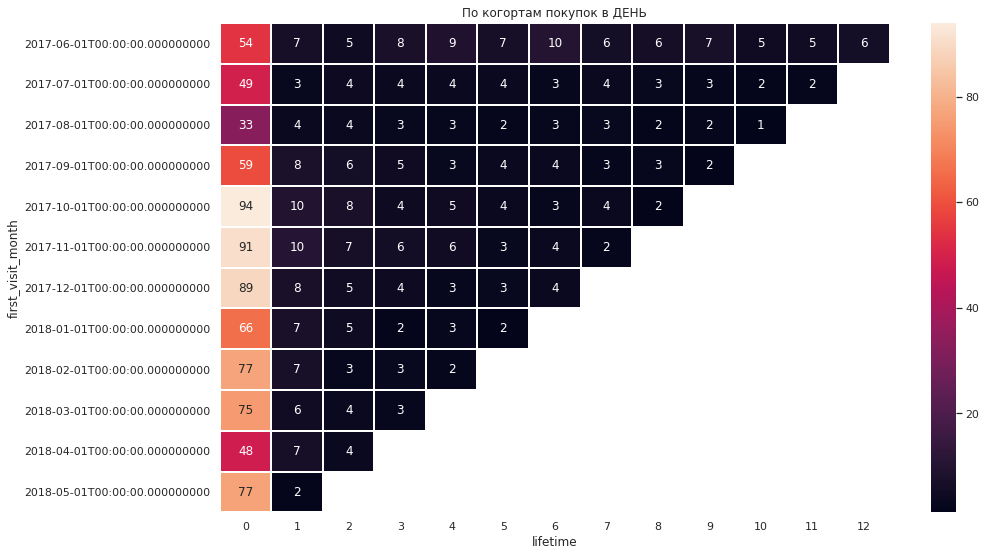

In [61]:
heatmap_cohort(cohort_buy_day_pivot, 'По когортам покупок в ДЕНЬ', '.0f')

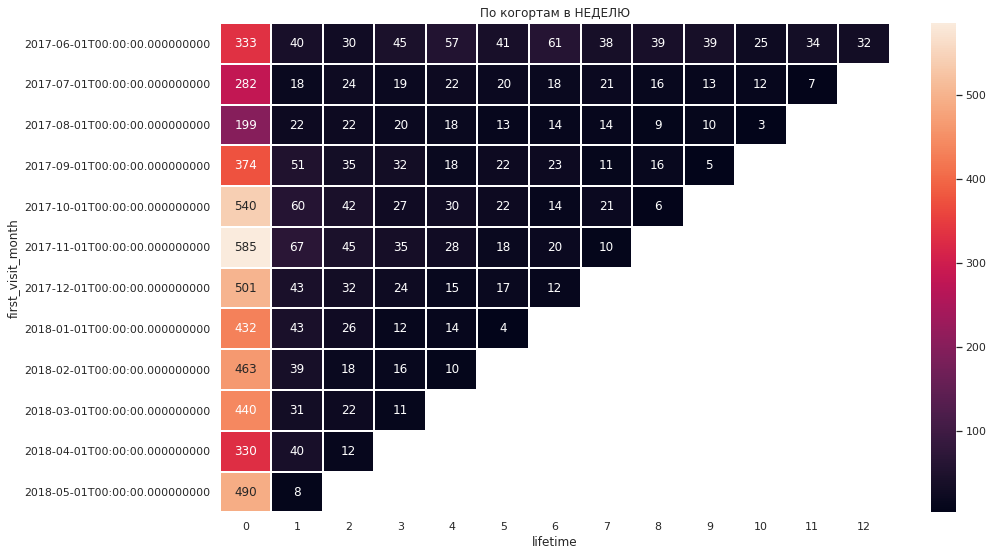

In [62]:

heatmap_cohort(cohort_buy_week_pivot, 'По когортам в НЕДЕЛЮ', '.0f')

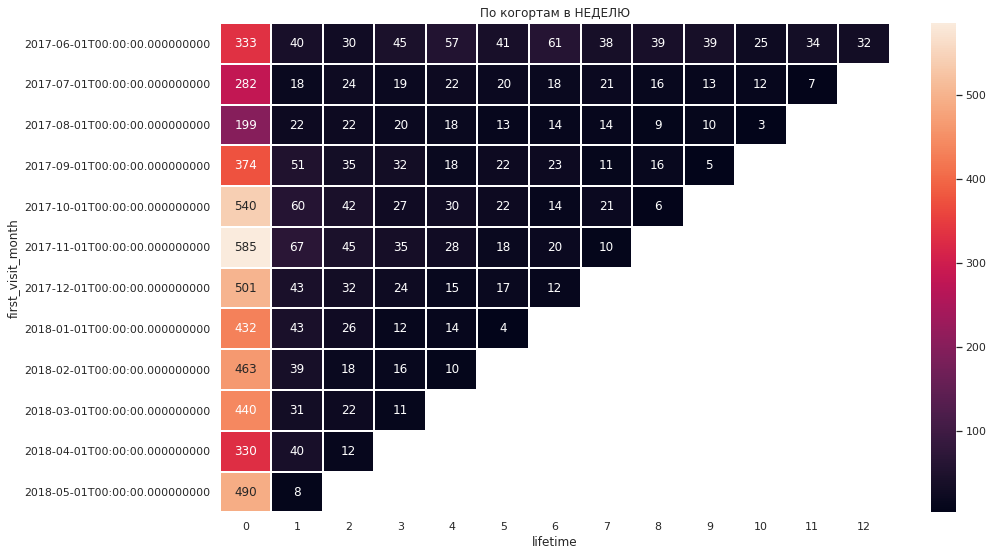

In [63]:

heatmap_cohort(cohort_buy_week_pivot, 'По когортам в НЕДЕЛЮ', '.0f')

Необходимо отметить, что когорты октября, ноября и декабря 2017 года, куда интенсивнее приобретали билеты, чем другие коготры за сходий период времени.

**Какой средний чек?**

Для расчета среднего чека, в первую очередь, определимся интересует ли он нас в целом, за какой-то период или же с точки зрения когорт. Рассчитаем средний чек за год, месяц, неделю и день, а так же посмотрим различаются ли когорты по среднему чеку.

In [64]:
orders_and_visits.head()

,buy_ts,revenue,uid,first_visit,lifetime,first_visit_month,buy_ts_date,buy_ts_week,buy_ts_month,buy_ts_year
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,0,2017-06-01,2017-06-01,22,6,2017
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,0,2017-06-01,2017-06-01,22,6,2017
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,0,2017-06-01,2017-06-01,22,6,2017
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,0,2017-06-01,2017-06-01,22,6,2017
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,0,2017-06-01,2017-06-01,22,6,2017


In [65]:
average_check = orders_and_visits['revenue'].sum() / len(orders_and_visits)
print('Средний чек за период с июня 2017 по конец мая 2018 года составляет: {:.2f}'.format(average_check))

Средний чек за период с июня 2017 по конец мая 2018 года составляет: 4.76


In [66]:
#Подготовим данные для вывода красивого графика
orders_and_visits_for_check = orders_and_visits.copy()
orders_and_visits_for_check['buy_month'] = orders_and_visits_for_check['buy_ts'].astype('datetime64[M]').dt.date
average_check_per_month = orders_and_visits_for_check.groupby(['buy_month'])['revenue'].mean().reset_index()

In [67]:
#выведем получившееся средние чеки на графике, прежварительно автоматизировав barplot

def show_barplot(x_line, y_line):

    fig, ax1 = plt.subplots(figsize=(19, 6))

    ax = sns.barplot(x = x_line, ax = ax1, y = y_line)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40)

    s = 0
    for p in ax.patches:
        s+= p.get_height()
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2,
                 p.get_height(),
                '{:.2f}'.format(float(p.get_height())),
                 fontsize=12,
                 color='black',
                 ha='center',
                 va='bottom')

    plt.show()

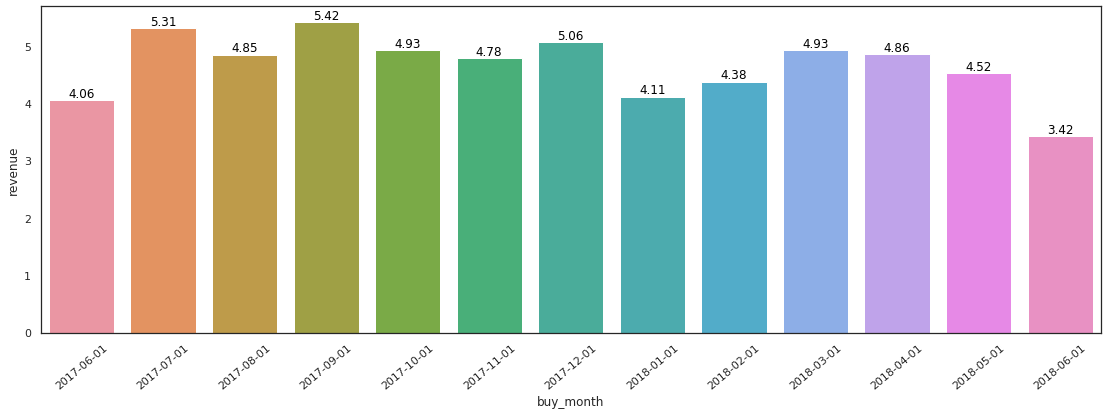

In [68]:
show_barplot(average_check_per_month['buy_month'], average_check_per_month['revenue'])

Таким образом мы можем наблюдать, что в июне (симметрично в 2017 и 2018) и январе наблюдаются наибольшие просадки.

In [69]:
#Расчет среднего чека по когортам

cohort_check_month = ((orders_and_visits.groupby(['first_visit_month', 'lifetime', 'buy_ts_year', 'buy_ts_month'])
                       .agg({'uid': 'count', 'revenue' : 'sum'}).reset_index()))
cohort_check_month['check'] = cohort_check_month['revenue']  / cohort_check_month['uid'] 


cohort_check_month_pivot = cohort_check_month.pivot_table(index = 'first_visit_month', columns = 'lifetime', 
                                              values = 'check', aggfunc = 'mean')

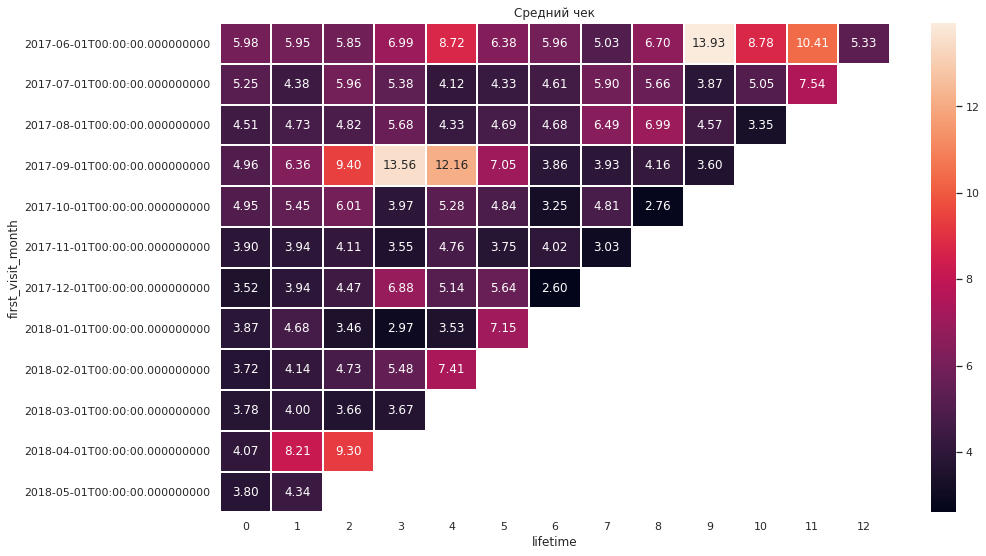

In [70]:
heatmap_cohort(cohort_check_month_pivot, 'Средний чек', '.2f')

В декабре 2017 года средний чек сентябрьской когорты выбивается из общей картины (этот скачек можно отметить и в среднем чеке по месяцам (5.85)). Посмотрим, кто же сделал "кассу" в этом месяце.

In [71]:
orders_and_visits.head()
orders_and_visits.query('buy_ts_year == 2017 and buy_ts_month == 12').sort_values('revenue', ascending = False).head()

,buy_ts,revenue,uid,first_visit,lifetime,first_visit_month,buy_ts_date,buy_ts_week,buy_ts_month,buy_ts_year
11743,2017-12-15 21:22:00,604.39,5539673724080479777,2017-09-07 13:45:00,3,2017-09-01,2017-12-15,50,12,2017
11724,2017-12-05 00:50:00,402.72,5539673724080479777,2017-09-07 13:45:00,3,2017-09-01,2017-12-05,49,12,2017
1935,2017-12-01 11:59:00,378.89,17999372575896145244,2017-06-04 14:29:00,6,2017-06-01,2017-12-01,48,12,2017
11728,2017-12-08 12:25:00,360.55,5539673724080479777,2017-09-07 13:45:00,3,2017-09-01,2017-12-08,49,12,2017
11723,2017-12-04 18:40:00,344.36,5539673724080479777,2017-09-07 13:45:00,3,2017-09-01,2017-12-04,49,12,2017


Это уже знакомые нам пользователи, совершившие максимальные приобретения из самого начала проекта, но кого мы не отрезали, как выбросы, чтобы не исказить данные крупным удалением

**Сколько денег приносят? (LTV)**

Чтобы рассчитать LTV, соеденим данные о совершенных заказах с данными о визитах, сгруппировав и те, и другие по пользователю

In [72]:
#из всех купивших пользователей, сколько раз они покупали и какую суммарную выручку принесли.
orders_for_report = (orders_and_visits.groupby('uid')
                     .agg({'buy_ts' : 'count', 'revenue' : 'sum'}).reset_index())
print(orders_for_report.shape[0])

36523


In [73]:
#из всех посетивших сервис пользователей, сколько визитов они произвели, с каких устройств пришли (в первый раз),
#когда впервые попали на сервис

visits_for_report = (visits_clean.groupby('uid')
                    .agg({'start_ts' : 'count', 'first_visit_month' : 'min', 'session_duration' : 'mean'}).reset_index())

In [74]:
#чтобы получить источник первого захода и устройство первого захода, отсортируем таблицу по дате первого захода и сбросим
#дублирующие uid строки, а затем перепроверим себя, ведь размер таблиц должен совпасть

user_device = visits_clean.sort_values('start_ts')
user_device = user_device[['uid', 'device', 'source_id']]
user_device = user_device.drop_duplicates(subset='uid', keep="first")
print(visits_for_report.shape[0])
print(user_device.shape[0])

228169
228169


In [75]:
#Смержим получившиеся источники прихода и устройств с визитами уникальных пользователей
visits_for_report = visits_for_report.merge(user_device, on = 'uid')

Для завершения подготовки данных к последующей работе, нам требуется соединить информацию о заказах с информацией о визитах

In [76]:
report = visits_for_report.merge(orders_for_report, how = 'left', on = 'uid')
report.sort_values('buy_ts', ascending = False).head()

,uid,start_ts,first_visit_month,session_duration,device,source_id,buy_ts,revenue
45081,3644482766749211722,249,2017-06-01,943.132530,desktop,5,239.0,1444.29
171696,13888745432979765063,190,2017-06-01,1588.736842,desktop,1,238.0,1191.02
147547,11920452646463905188,275,2017-06-01,1180.363636,desktop,1,227.0,1123.22
83431,6731421022966725351,146,2017-08-01,1149.863014,desktop,5,183.0,1450.68
43279,3501596628378158474,149,2017-06-01,947.516779,desktop,1,150.0,700.24


Таким образом мы получили датафрейм с перечислением всех пользователей, которые когда-либо побывали на сайте Яндекс.Афиши, с указанием:

- "start_ts" количества сессий;
- "first_visit_month" принадлежности к когорте;
- "session_duration" средней продолжительностью сессии;
- "device" устройством первого захода;
- "source_id" источником первого захода;
- "buy_ts" - количеством совершенных заказов;
- "revenue" - суммарной выручкой с данного пользователя
Чтобы расчитать LTV, нам необходимо посмотреть сколько денег нам приносит пользователь за свой lifetime, а такого рода данные мы можем получить собрав данные по когортам воедино

In [77]:
#сразу привяжем источник пользователя к заказам - это упростит нам дальнейшее построение метрик

uid_source_id = report[['uid', 'source_id']].copy()
orders_and_visits_device = orders_and_visits.merge(uid_source_id)

In [78]:
#Построим когорты по заказам, добавив информацию о первоначальном размере когорты
cohort_month_for_medge = (orders_and_visits_device.groupby(['first_visit_month', 'lifetime'])
                          .agg({'uid' : 'count', 'revenue' : 'sum'})).reset_index()

#размер когорты
cohort_size_orders = cohort_month_for_medge[cohort_month_for_medge['lifetime'] == 0]
cohort_size_orders = cohort_size_orders[['first_visit_month', 'uid']].copy()
cohort_size_orders.columns = ['first_visit_month', 'cohort_size_orders']

#соединяем воедино

cohort_month_for_medge = cohort_month_for_medge.merge(cohort_size_orders)
cohort_month_for_medge.columns = ['first_visit_month','lifetime', 'uid_orders', 'revenue', 'cohort_size_orders']
cohort_month_for_medge.head()

,first_visit_month,lifetime,uid_orders,revenue,cohort_size_orders
0,2017-06-01,0,2334,9452.06,2334
1,2017-06-01,1,358,2361.64,2334
2,2017-06-01,2,267,1445.11,2334
3,2017-06-01,3,404,2930.03,2334
4,2017-06-01,4,514,4590.81,2334


Аналогичным образом поступим с даннми о визитах - сгруппируем их по когортам, источникам и лайфтайму, чтобы после можно было собрать обе таблицы по нескольким индексам

In [79]:
#Построим когорты по визитам

cohort_visits_device = (visits_clean.groupby(['first_visit_month', 'lifetime']).agg({'uid': 'nunique'})
                        .reset_index())

#Добудем информацию о размере когорты

cohort_size_visits = cohort_visits_device[cohort_visits_device['lifetime'] == 0]
cohort_size_visits = cohort_size_visits[['first_visit_month',  'uid']].copy()
cohort_size_visits.columns = ['first_visit_month', 'cohort_size_visitss']

#Соединим все воедино
cohort_visits_device = cohort_visits_device.merge(cohort_size_visits)
cohort_visits_device.columns = ['first_visit_month', 'lifetime', 'uid_visits', 'cohort_size_visits']
cohort_visits_device.head()

,first_visit_month,lifetime,uid_visits,cohort_size_visits
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259


Когда сформированы два датасета, имеющих общие индексы: когорты и лайфтайм, соберем все вместе

In [80]:
cohort_for_report = cohort_visits_device.merge(cohort_month_for_medge)
cohort_for_report.head()

,first_visit_month,lifetime,uid_visits,cohort_size_visits,uid_orders,revenue,cohort_size_orders
0,2017-06-01,0,13259,13259,2334,9452.06,2334
1,2017-06-01,1,1043,13259,358,2361.64,2334
2,2017-06-01,2,713,13259,267,1445.11,2334
3,2017-06-01,3,814,13259,404,2930.03,2334
4,2017-06-01,4,909,13259,514,4590.81,2334


In [81]:
#Рассчитаем ltv от общего количества привлеченных пользователей (мне кажется более правильным рассчитывать именно
#от этих данных, ведь маркетинговые траты должны учитывать конверсию пользователей.)

cohort_for_report['ltv'] = cohort_for_report['revenue'] / cohort_for_report['cohort_size_visits']

#Рассчитаем выручку от общего количества покупающих пользователей (ARPPU),
#ведь исходя из логики задания просят посчитать это (см. лабораторию))

cohort_for_report['arppu'] = cohort_for_report['revenue'] / cohort_for_report['cohort_size_orders']
cohort_for_report.head()

,first_visit_month,lifetime,uid_visits,cohort_size_visits,uid_orders,revenue,cohort_size_orders,ltv,arppu
0,2017-06-01,0,13259,13259,2334,9452.06,2334,0.712879,4.049726
1,2017-06-01,1,1043,13259,358,2361.64,2334,0.178116,1.011842
2,2017-06-01,2,713,13259,267,1445.11,2334,0.108991,0.619156
3,2017-06-01,3,814,13259,404,2930.03,2334,0.220984,1.255368
4,2017-06-01,4,909,13259,514,4590.81,2334,0.346241,1.966928


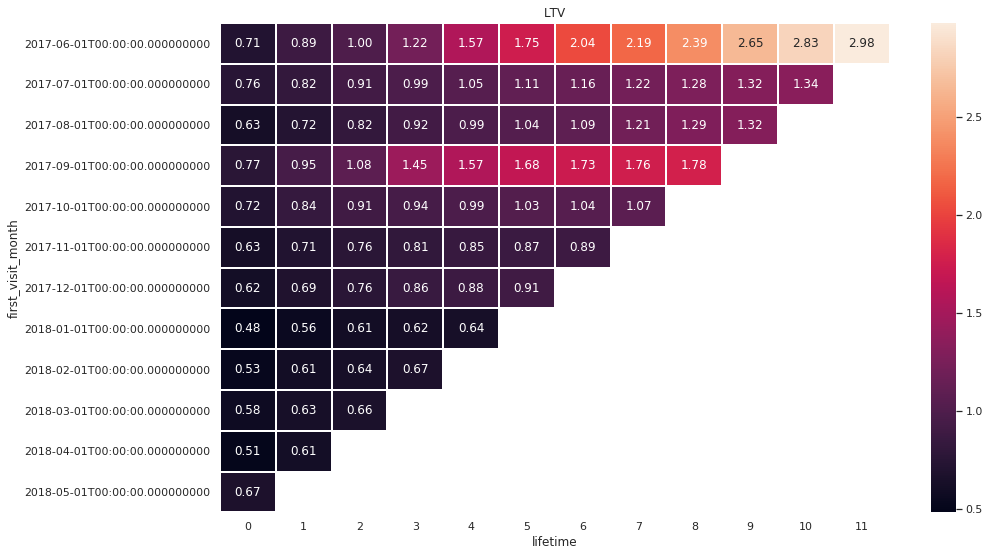

In [82]:
#Рассчитаем LTV

ltv_pivot9 = cohort_for_report.pivot_table(index = 'first_visit_month', 
                                                columns = 'lifetime', values = 'ltv', aggfunc = 'mean')

ltv_pivot = ltv_pivot9.cumsum(axis=1)
heatmap_cohort(ltv_pivot, 'LTV', '.2f')

Таким образом мы можем наглядно увидеть сколько денег нам приносит один пользователь за весь "цикл" пребывания на сайте 

Рассмотрим данные чуть более детально. Посмотрим, как выглядят LTV  к шестому месяцу жизни пользователя на сайте

In [95]:
# К имеющимся у нас когортам, добавим данные о 6 месяце жизни пользователя. Для начала соберем когорты.
cohort_common = (cohort_for_report.query('lifetime == 0'))
cohort_common = cohort_common[['first_visit_month', 'cohort_size_visits', 'cohort_size_orders']]

In [96]:
#Затем подготовим ltv   для соединения с когортами
ltv_six_mounth = ltv_pivot.reset_index()
ltv_six_mounth = ltv_six_mounth[['first_visit_month',6]]
ltv_six_mounth.columns = ['first_visit_month', 'ltv_six_mounth']

In [101]:
#Соединим получившиеся данные с когортами, чтобы сделать вывод, какая из них окупилась и какой ltv 6 месяца средний
cohort_common = cohort_common.merge(ltv_six_mounth)
cohort_common = cohort_common.merge(arppu_six_mounth)
cohort_common.head()

,first_visit_month,cohort_size_visits,cohort_size_orders,ltv_six_mounth,0,1,2,3,4,5,6,7,8,9,10,11
0,2017-06-01,13259,2334,2.038740,4.049726,5.061568,5.680724,6.936093,8.903021,9.956093,11.581684,12.441654,13.582365,15.066500,16.063458,16.932339
1,2017-07-01,13140,1977,1.155811,5.028295,5.478063,6.080905,6.556363,6.979535,7.378447,7.682023,8.126439,8.476272,8.742099,8.925771,NaN
2,2017-08-01,10181,1390,1.093948,4.606223,5.286763,5.998029,6.719266,7.219504,7.594619,8.012576,8.842101,9.437036,9.663122,NaN,NaN
3,2017-09-01,16704,2616,1.733476,4.897886,6.079702,6.902703,9.279159,10.010375,10.731433,11.068800,11.252641,11.392676,NaN,NaN,NaN
4,2017-10-01,25977,4320,1.043992,4.307998,5.051812,5.455266,5.674116,5.962171,6.168859,6.277727,6.436414,NaN,NaN,NaN,NaN


In [127]:
print('Средний LTV к 6 месяцу составляет: {:.2f}'.format(cohort_common['ltv_six_mounth'].mean()))
 

Средний LTV к 6 месяцу составляет: 1.33


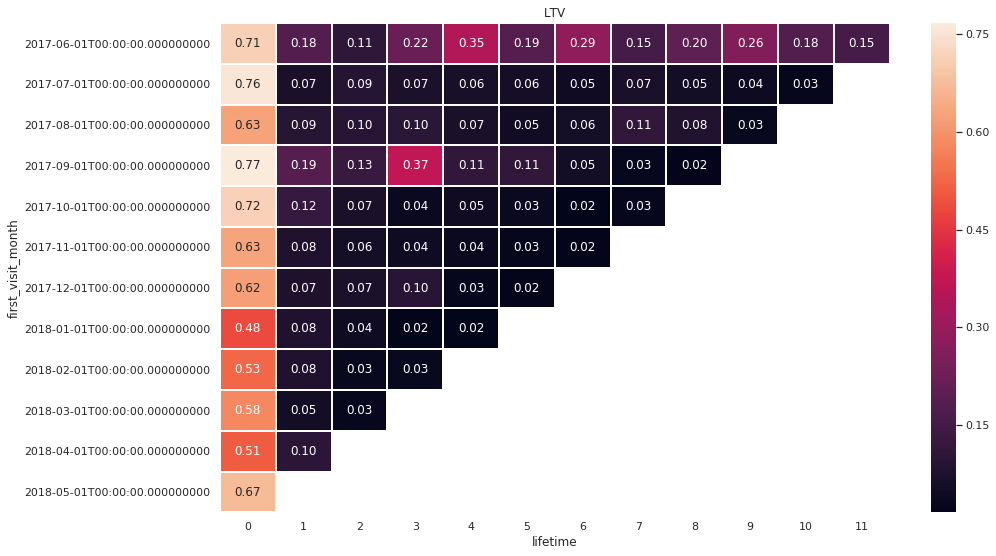

In [103]:
heatmap_cohort(ltv_pivot9, 'LTV', '.2f')

---

### Комментарий наставника

Молодец. Полученные результаты будут полезны отделу продаж :)

---

5. Маркетинговые метрики 

**Сколько денег потратили? Всего / на каждый источник / по времени**

In [104]:
print('Всего на маркетинг было потрачено:', costs['costs'].sum())

Всего на маркетинг было потрачено: 329131.62


Для того, чтобы ответить на вопрос, сколько было потрачено средств на каждый источник привлечения клиента, сгруппируем данные:

In [105]:
costs_group = costs.groupby('source_id')['costs'].sum().reset_index()
costs_group.sort_values('costs', ascending = False)

,source_id,costs
2,3,141321.63
3,4,61073.60
4,5,51757.10
1,2,42806.04
0,1,20833.27
6,10,5822.49
5,9,5517.49


Посмотрим как по месяцам распределялись финансы между разными источниками

In [107]:
#Подготовим данные для вывода красивого графика

costs['costs_month'] = costs['dt'].astype('datetime64[M]').dt.date
costs_source = costs.groupby( 'source_id')['costs'].sum().reset_index()
costs_source = costs_source.groupby('source_id')['costs'].mean().reset_index().sort_values(by = 'costs', ascending = False)

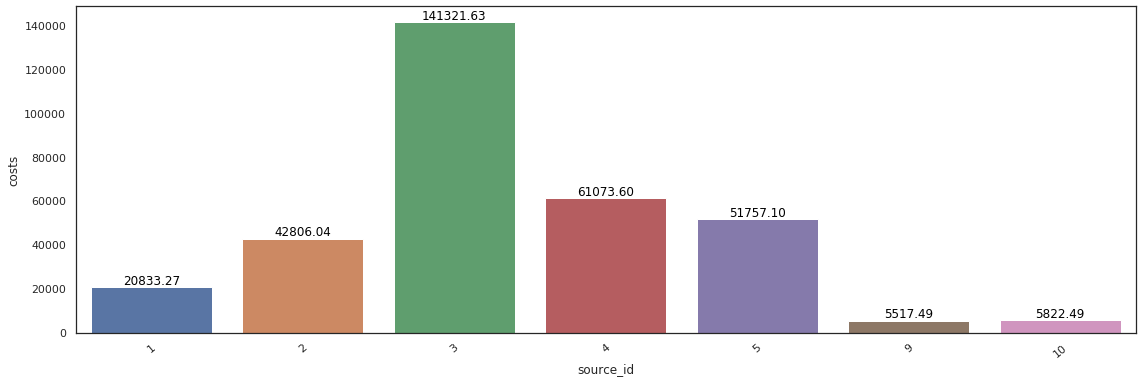

In [108]:
show_barplot(costs_source['source_id'], costs_source['costs'])

Самым затратным является 3 источник.

Чтобы ответить на вопрос, сколько денег тратили на маркетинг во временном интервале, выделим месяц произведения затрат (все расчеты по другим метрикам так же производились по месяцам), а после сгруппируем.

In [109]:

costs_month = costs.groupby('costs_month')['costs'].sum().reset_index()
costs_month

,costs_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


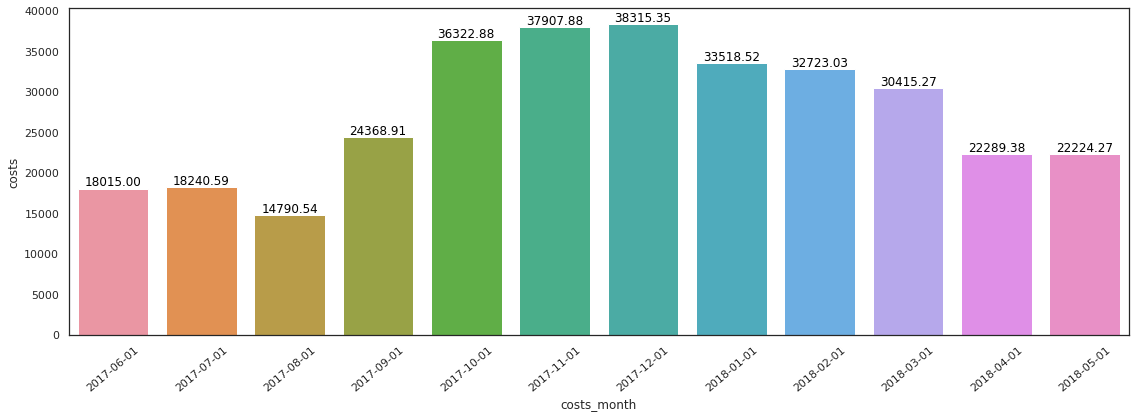

In [110]:
show_barplot(costs_month['costs_month'], costs_month['costs'])

In [111]:

print('Больше всего средств на маркетинг тратили с октября по декабрь 2017 года.', 
      'В среднем в месяц на маркетинг было потрачено:',
      '{:.2f}'.format(costs_month['costs'].mean()))

Больше всего средств на маркетинг тратили с октября по декабрь 2017 года. В среднем в месяц на маркетинг было потрачено: 27427.63


**Сколько стоило привлечение одного покупателя из каждого источника?**

Чтобы ответить на этот вопрос, вернемся к собранным в единое целое данным по пользователям, дополним таблицу с месячными когортами (с указанем источника, через который они появиись на сервисе), информацией о затратах и расчитаем cac

In [112]:
#рассчитаем количество затрат помесячно на каждый источник
costs['first_visit_month'] = costs['dt'].astype('datetime64[M]') #назовем столбец с датой затрат так же, как столбец с когортами
costs_for_report = costs[['source_id', 'first_visit_month', 'costs']].copy()
costs_for_report = costs_for_report.groupby(['source_id', 'first_visit_month']).agg({'costs' : 'sum'}).reset_index()
costs_for_report.head()

,source_id,first_visit_month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75


Теперь ничего не мешает нам посчитать "cac"

In [113]:
#рассчитаем количество пользователей из каждого источника

uid_in_source = report.groupby(['first_visit_month', 'source_id'])['uid'].count().reset_index()
uid_in_source.head()

,first_visit_month,source_id,uid
0,2017-06-01,1,629
1,2017-06-01,2,1260
2,2017-06-01,3,4081
3,2017-06-01,4,3448
4,2017-06-01,5,2733


In [114]:
#соберем данные вместе

costs_for_report = costs_for_report.merge(uid_in_source)
costs_for_report['first_visit_month'] = costs_for_report['first_visit_month'].dt.date
costs_for_report['cac'] = costs_for_report['costs'] / costs_for_report ['uid']
costs_for_report.head()

,source_id,first_visit_month,costs,uid,cac
0,1,2017-06-01,1125.61,629,1.789523
1,1,2017-07-01,1072.88,540,1.986815
2,1,2017-08-01,951.81,369,2.579431
3,1,2017-09-01,1502.01,685,2.192715
4,1,2017-10-01,2315.75,1039,2.228826


Когда наша таблица полностью "укомплектована" перейдем к ответу на вопрос: сколько стоит привлечение одного покупателя из каждого источника.

In [115]:
def comparison_of_two(data, x_line, y_line, hue, title):
    """сравнивает несколько категорий"""
    
    fig, ax1 = plt.subplots(figsize=(21, 6))
    
    plt.title(title)

    ax = sns.barplot(data = data, x=x_line, y=y_line, hue = hue, ax = ax1, alpha=.5)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
    s = 0
    for p in ax.patches:
       s+= p.get_height()
    for p in ax.patches:
       ax.text(p.get_x() + p.get_width()/2,
               p.get_height(),
               '{:.2f}'.format(float(p.get_height())),
               fontsize=8,
               color='black',
               ha='center',
               va='bottom')
    plt.show()

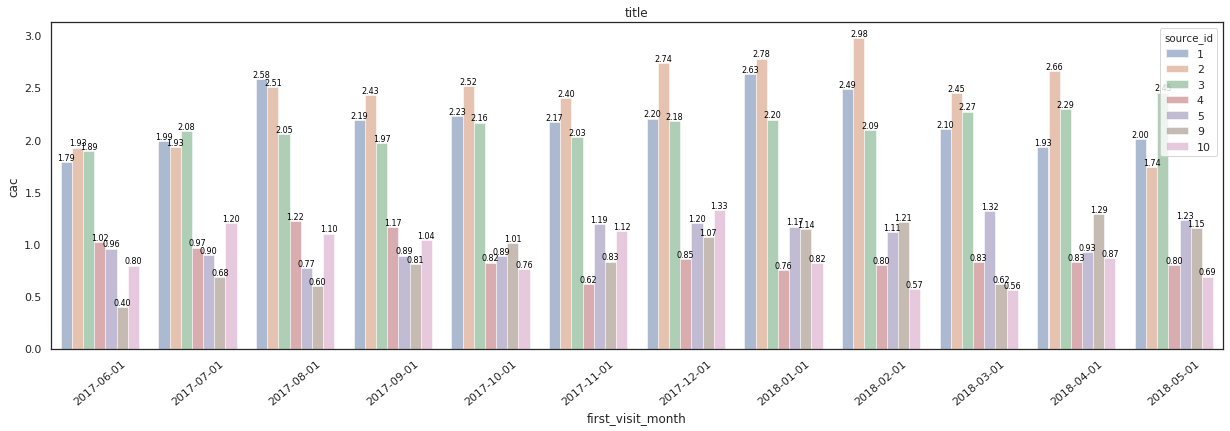

In [116]:
comparison_of_two(costs_for_report, 'first_visit_month', 'cac','source_id',  'title')

Выводятся не все источники, содержащиеся в привлечении. Посмотрим, что прошло мимо нас.

In [117]:

outside_uid = visits.query('source_id == 8 or source_id == 7 or source_id == 6')['uid']
orders.query('uid in @outside_uid')

,buy_ts,revenue,uid
5485,2017-08-17 11:20:00,1.22,11377414203346034748


In [118]:
visits.query('uid == 11377414203346034748')

,uid,device,end_ts,source_id,start_ts,session_date,session_week,session_month,session_year,session_duration
83135,11377414203346034748,desktop,2017-08-17 11:56:00,7,2017-08-17 10:28:00,2017-08-17,33,8,2017,5280.0


In [119]:
costs.query('source_id == 8 or source_id == 7 or source_id == 6')

,source_id,dt,costs,costs_month,first_visit_month


Выходит, не потратив ни копейки, мы с одного из источников получили покупателя. Отличная новость. К тому же, мы не потеряли никакие данные.

---

### Комментарий наставника

Хм...интересно :)

---


**На сколько окупились расходы? (ROI)**

Произведем расчет ROI

In [120]:
costs_for_roi = costs.groupby('first_visit_month')['costs'].sum().reset_index()
costs_for_roi

,first_visit_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


In [121]:
cohort_for_report = cohort_for_report.merge(costs_for_roi)
cohort_for_report['cac_visits'] = cohort_for_report['costs'] / cohort_for_report ['cohort_size_visits']
cohort_for_report['cac_orders'] = cohort_for_report['costs'] / cohort_for_report ['cohort_size_orders']
cohort_for_report.head()

,first_visit_month,lifetime,uid_visits,cohort_size_visits,uid_orders,revenue,cohort_size_orders,ltv,arppu,costs,cac_visits,cac_orders
0,2017-06-01,0,13259,13259,2334,9452.06,2334,0.712879,4.049726,18015.0,1.3587,7.718509
1,2017-06-01,1,1043,13259,358,2361.64,2334,0.178116,1.011842,18015.0,1.3587,7.718509
2,2017-06-01,2,713,13259,267,1445.11,2334,0.108991,0.619156,18015.0,1.3587,7.718509
3,2017-06-01,3,814,13259,404,2930.03,2334,0.220984,1.255368,18015.0,1.3587,7.718509
4,2017-06-01,4,909,13259,514,4590.81,2334,0.346241,1.966928,18015.0,1.3587,7.718509


In [122]:
cohort_for_report['roi_visits'] = cohort_for_report['ltv'] / cohort_for_report['cac_visits']
#чтобы посчитать в разрезе покупателей, делить надо изначальное количество всех покупателей в когорте
cohort_for_report['roi_orders'] = cohort_for_report['arppu'] / cohort_for_report['cac_orders']
#поделить общее число когорты на сас заказов.
cohort_for_report['roi_danger'] = cohort_for_report['ltv'] / cohort_for_report['cac_orders']
cohort_for_report.head()

,first_visit_month,lifetime,uid_visits,cohort_size_visits,uid_orders,revenue,cohort_size_orders,ltv,arppu,costs,cac_visits,cac_orders,roi_visits,roi_orders,roi_danger
0,2017-06-01,0,13259,13259,2334,9452.06,2334,0.712879,4.049726,18015.0,1.3587,7.718509,0.524677,0.524677,0.092360
1,2017-06-01,1,1043,13259,358,2361.64,2334,0.178116,1.011842,18015.0,1.3587,7.718509,0.131093,0.131093,0.023076
2,2017-06-01,2,713,13259,267,1445.11,2334,0.108991,0.619156,18015.0,1.3587,7.718509,0.080217,0.080217,0.014121
3,2017-06-01,3,814,13259,404,2930.03,2334,0.220984,1.255368,18015.0,1.3587,7.718509,0.162644,0.162644,0.028630
4,2017-06-01,4,909,13259,514,4590.81,2334,0.346241,1.966928,18015.0,1.3587,7.718509,0.254833,0.254833,0.044859


In [123]:
roi_pivot_visits = cohort_for_report.pivot_table(index = 'first_visit_month', 
                                                columns = 'lifetime', values = 'roi_visits', aggfunc = 'mean')

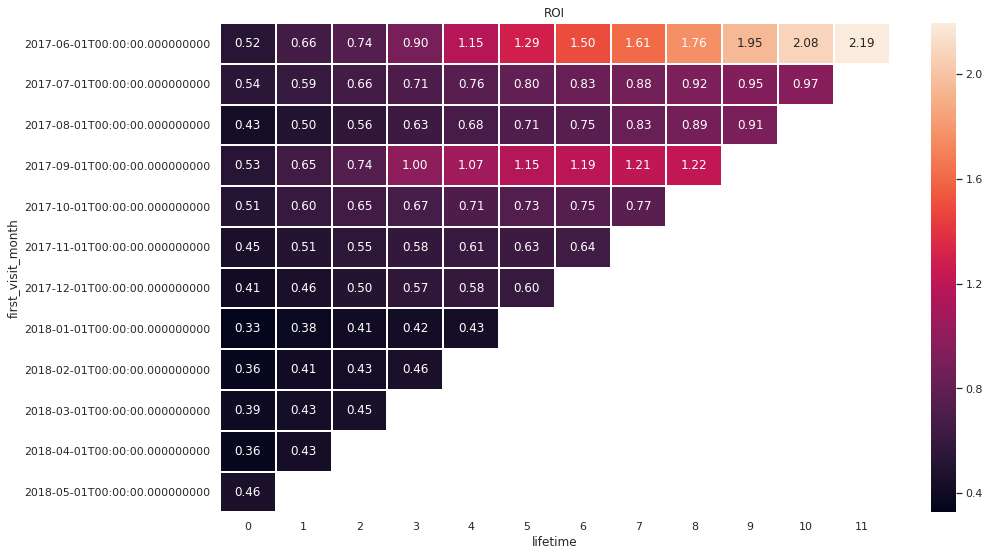

In [124]:
heatmap_cohort(roi_pivot_visits.cumsum(axis = 1), 'ROI', '.2f')

In [125]:
roi_pivot_danger = cohort_for_report.pivot_table(index = 'first_visit_month', 
                                                columns = 'lifetime', values = 'roi_danger', aggfunc = 'mean')

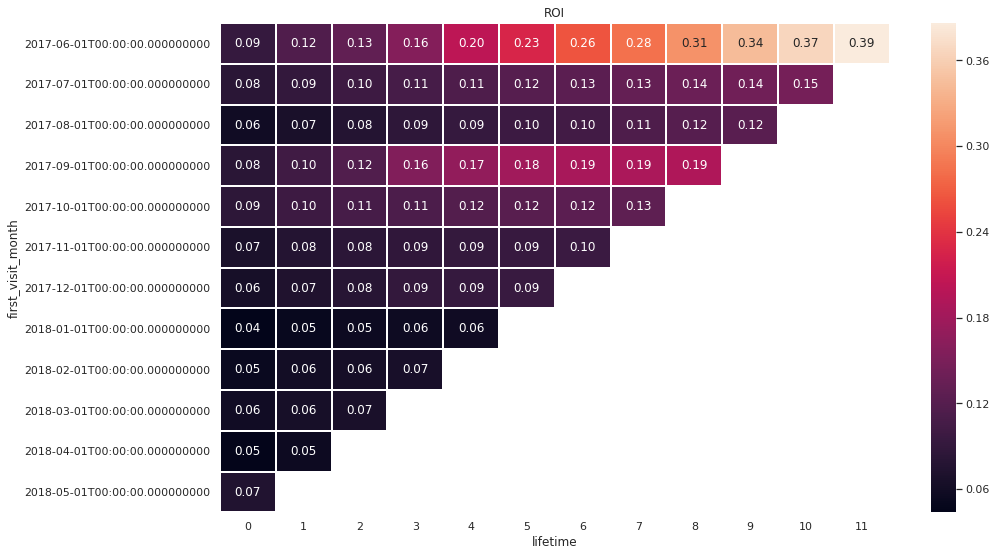

In [126]:
heatmap_cohort(roi_pivot_danger.cumsum(axis = 1), 'ROI', '.2f')


Судя по всему, затраты на привлечение окупились с головой, главное не смотреть на конверсию пользователей.

#### 6. Графический раздел

**Влияние рекламных источников**

Для начала взглянем на то, как рекламные источники влияют на количество привлеченных пользователей.

In [129]:
def plot_magic(data, title_plot, x_line, y_line, y2_line):
    """рисует графики с 2мя игриками"""
    fig, ax = plt.subplots(figsize = (20, 5))
    
    g = sns.barplot(data = data, x=x_line, y=y_line, ax=plt.subplot(1, 2, 1), alpha=.5)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)

    plt.title(title_plot)
    y2_line.plot(ax=plt.subplot(1, 2, 1), secondary_y = True, grid = True)
    
    plt.show()

In [130]:
report_people = report.groupby('source_id')['uid'].count().reset_index()
report_costs = costs.groupby('source_id')['costs'].sum().reset_index()
report_source = report_people.merge(report_costs)
report_source.head()

,source_id,uid,costs
0,1,9490,20833.27
1,2,17607,42806.04
2,3,66107,141321.63
3,4,72330,61073.60
4,5,49266,51757.10


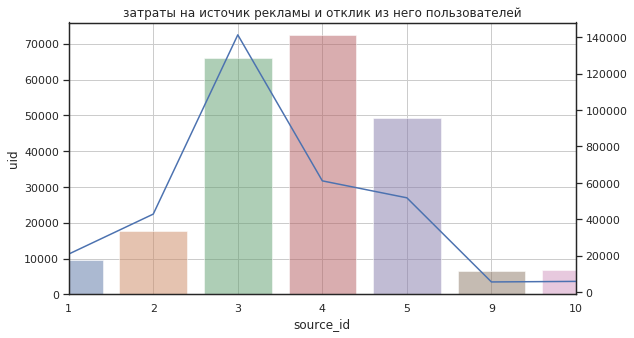

In [131]:
plot_magic(report_source, 'затраты на источик рекламы и отклик из него пользователей', 
            'source_id', 'uid', report_source['costs'])

Очевидно, что из 4 источника появляется большая часть пользователей, при том, что расходы на него куда меньше, чем на 3. Можно предположить, что если увеличить затраты на 4 и 5 источник (с похожей динамикой), то возможно можно обеспечить бОльший прирост пользователей при сопоставимых затратах с 3 источником

In [132]:
#Подготовим данные к тому, чтобы сравнить CAC и LTV из разных источников
revenue_for_graf = report.groupby(['source_id'])['revenue'].sum().reset_index()
ltv_cac_source = report_source.merge(revenue_for_graf)

In [133]:
# добавим информацию о ltv и cac

ltv_cac_source['ltv'] = ltv_cac_source['revenue'] / ltv_cac_source['uid']
ltv_cac_source['cac'] = ltv_cac_source['costs'] / ltv_cac_source['uid']
ltv_cac_source

,source_id,uid,costs,revenue,ltv,cac
0,1,9490,20833.27,29876.00,3.148156,2.195287
1,2,17607,42806.04,38362.98,2.178848,2.431194
2,3,66107,141321.63,54391.15,0.822774,2.137771
3,4,72330,61073.60,56682.99,0.783672,0.844374
4,5,49266,51757.10,50578.79,1.026647,1.050564
5,9,6434,5517.49,5666.56,0.880721,0.857552
6,10,6901,5822.49,4457.40,0.645906,0.843717


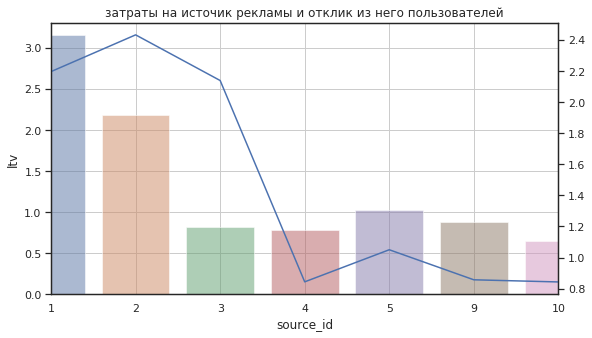

In [134]:
plot_magic(ltv_cac_source, 'затраты на источик рекламы и отклик из него пользователей', 
            'source_id', 'ltv', ltv_cac_source['cac'])

1 и 2 источники дают более выгодных клиентов, чем 3 и 4, даже не смотря на численное превосходство групп. Вероятно из них приходят более "целевые" пользователи, а в 3 и 4 много пустых посетителей.

**С каких устройств люди приходят? А с каких больше покупают?**

In [135]:
#сгруппируем отчетные данные для удобной работы с графиками

report_device = (report.groupby(['first_visit_month', 'device'])
                .agg({'uid':'nunique', 'buy_ts' : 'count', 'revenue' : 'sum'}).reset_index())

report_device['share_from_visiters'] = report_device['buy_ts'] / report_device['uid']
report_device['first_visit_month'] = report_device['first_visit_month'] .dt.date
report_device.head()

,first_visit_month,device,uid,buy_ts,revenue,share_from_visiters
0,2017-06-01,desktop,9677,2389,35411.76,0.246874
1,2017-06-01,touch,3582,534,4614.29,0.149079
2,2017-07-01,desktop,9225,1917,14080.85,0.207805
3,2017-07-01,touch,3915,541,3731.26,0.138186
4,2017-08-01,desktop,7413,1391,10364.25,0.187643


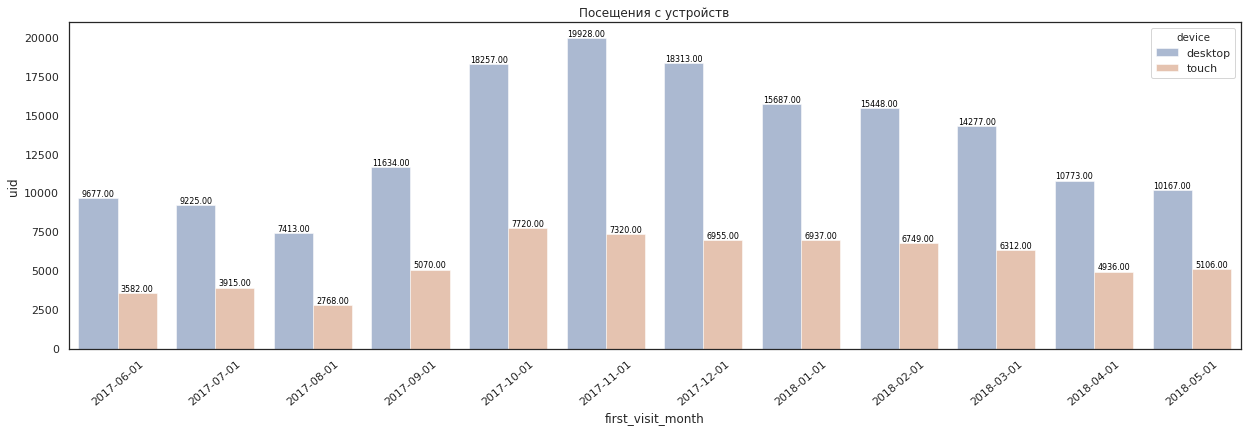

In [136]:
comparison_of_two(report_device, 'first_visit_month', 'uid', 'device', 'Посещения с устройств')

Заходы с разных типов устройст имеют схожие пики в октябре, ноябре и декабре 2017 года, но при этом разнца десктопной версии с предыдущими периодами больше. Может ли это значить, что для мобильной версии переходы на сайт куда менее удобные?

---

### Комментарий наставника

Может. А может также дело в том, что люди предпочитают брать билеты с десктопов

---

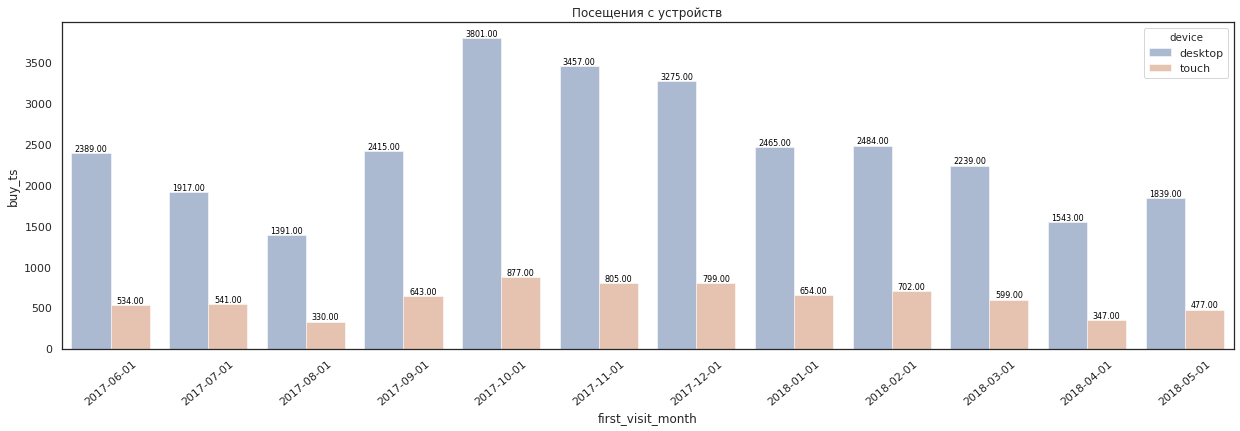

In [137]:
comparison_of_two(report_device, 'first_visit_month', 'buy_ts', 'device', 'Посещения с устройств')

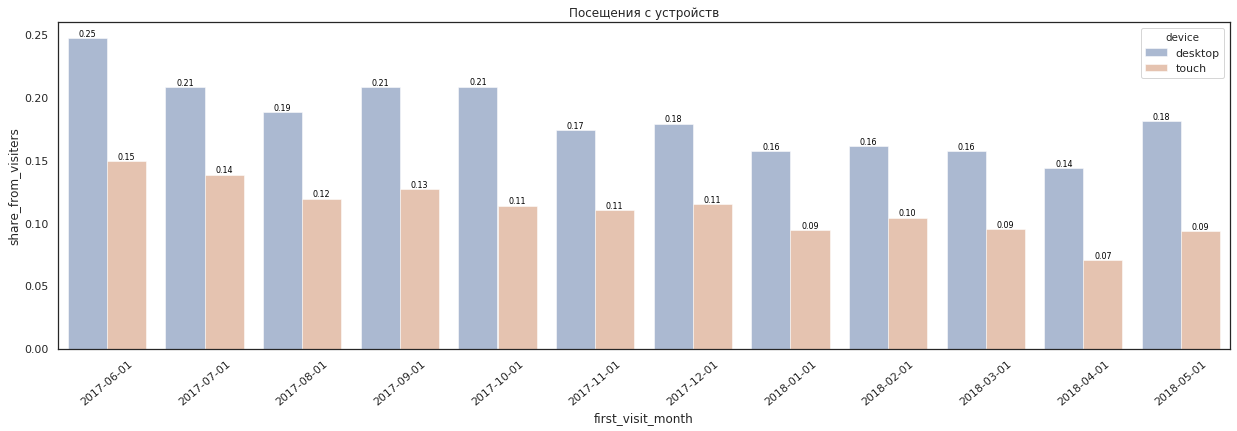

In [138]:
comparison_of_two(report_device, 'first_visit_month', 'share_from_visiters', 'device', 'Посещения с устройств')

Большой наплыв людей в осенне-зимний период 2017 года не повлек за собой увеличение доли покупателей, напротив, цифры снизились. Кроме того в апреле 2018 года просела доля покупающих с мобильных устройств - проблемы с приложением?

7. Итоговый вывод
По результатам проведенного исследования необходимо отметить следующие факторы, влиящие бизнес:

наибольшей популярностью сервис пользуется в осенние и зимние месяцы, перед завершением года, что, к сожалению, не приводит к сопоставимому с прошлым периодом увеличению количества продаж: много заходов заканчиваются несовершением продаж;
мобильная версия для покупателя менее привлекательна и к концу обозреваемого периода (апрель - май 2018 года) показыват снижение доли покупателей(при сопостовимом размере когорты в сентябре 2017 года доля купивших снизилас с 13 процентов до 7 в апреле). Снижение конверсии в десктопной версии не такое разительное, но все же присутствует, что может быть следствием сезонности (праздники).
наиболее активный рекламный источник - 4, при меньших затратах из него на сайт попадает бОльшее число пользователей, есть основания полагать, что при увеличении расходов на 4 и 5 источники визитов будет происходить больше. Необходимо так же отметить, что наимболее "покупающие" клиенты приходят из 1 и 2 источников - имеет смысл рассмотреть возможность увеличения финансирования и на эти рекламные направления, чтобы получить большее количество мотивированных к покупке пользователей.
большая часть пользователей не совершает повторных покупок, воспользовавшись сервисом лишь для первой покупки - (лишь 7% приходят в течении следующего после первой покупки месяца); необходимо создать мотивацию вновь возвращаться за приобретением.

---

### Комментарий наставника

Поздравляю со сдачей работы тебя :)

Мне очень понравилась твоя работа. Спасибо, было интересно проверять.

Ты очень вдумчиво анализировал, и делал предположения. Твои выводы были интересны и обоснованы. 

Также хочу отдельно отметить техническую и визуальную составляющую. Здорово, что ты эффективно используешь потенциал **pandas**, это радует. Графики были наглядные и красивые. Хитмап был абсолютно уместен.

Твоё исследование имеет ценность для заказывающих подразделений, но также замечу, что если бы ты параллельно исследовал "богатеньких", то твоя работа заставила всех бы задуматься глубже :)

Работу, конечно, принимаю. Желаю успеха в обучении :)

---